In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
who_data_original = pd.read_csv("who_data.csv", sep=";", index_col=0)
who_data_original['had_polio'] = np.where(who_data_original['WHS3_49']>0, 1, 0)
who_data = who_data_original.copy()


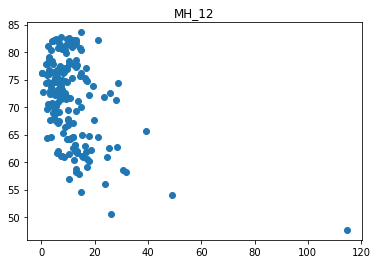

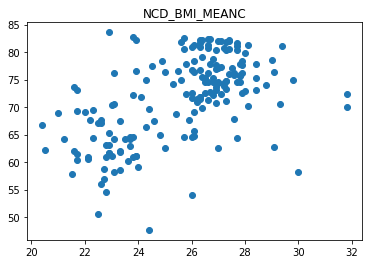

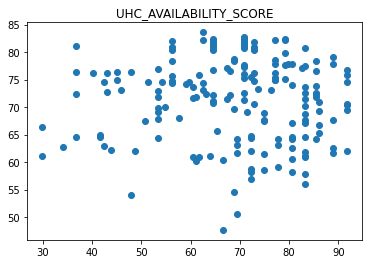

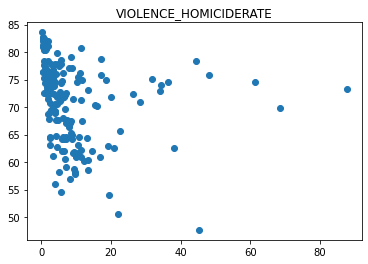

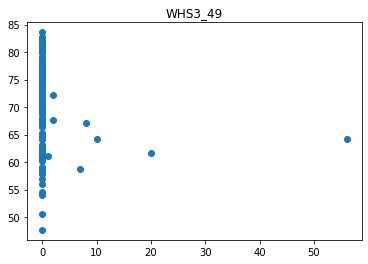

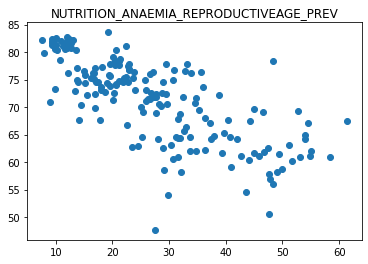

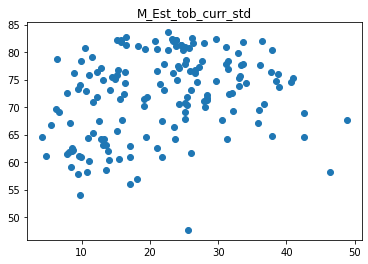

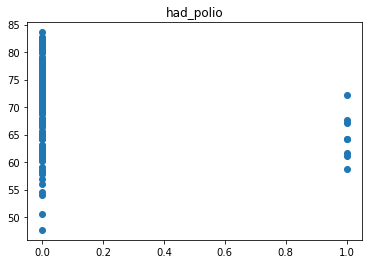

In [4]:
for i in list(who_data)[2:]:
    plt.scatter(x=who_data[i], y=who_data["WHOSIS_000001"])
    plt.title(i)
    plt.show()

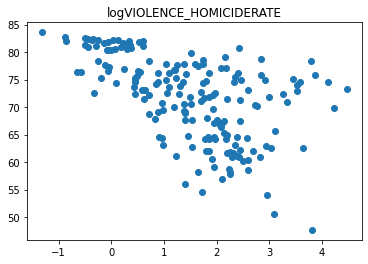

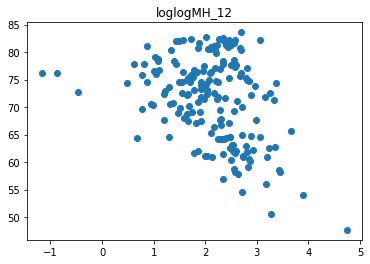

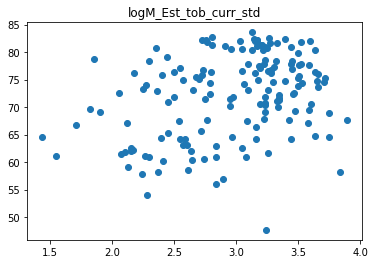

In [5]:
who_data['logVIOLENCE_HOMICIDERATE'] = np.log(who_data['VIOLENCE_HOMICIDERATE'])
plt.scatter(x=who_data['logVIOLENCE_HOMICIDERATE'], y=who_data["WHOSIS_000001"])
plt.title("logVIOLENCE_HOMICIDERATE")
plt.show()

who_data['logMH_12']= np.log(who_data['MH_12'])
plt.scatter(x=who_data['logMH_12'], y=who_data["WHOSIS_000001"])
plt.title("loglogMH_12")
plt.show()

who_data['logM_Est_tob_curr_std']= np.log(who_data['M_Est_tob_curr_std'])
plt.scatter(x=who_data['logM_Est_tob_curr_std'], y=who_data["WHOSIS_000001"])
plt.title("logM_Est_tob_curr_std")
plt.show()

In [6]:
who_data = who_data_original.copy()
who_data = who_data.dropna()
Y = who_data["WHOSIS_000001"]
X = who_data[who_data.columns[2:]]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          WHOSIS_000001   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3694.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   6.43e-157
Time:                        16:47:45   Log-Likelihood:                         -440.66
No. Observations:                 146   AIC:                                      897.3
Df Residuals:                     138   BIC:                                      921.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
MH_12                                     -0.1622      0.041     -3.940      0.000      -0.244      -0.081
NCD_BMI_MEANC                              2.6923      0.096     28.030      0.000       2.502       2.882
UHC_AVAILABILITY_SCORE                     0.1041      0.031      3.352      0.001       0.043       0.166
VIOLENCE_HOMICIDERATE                     -0.1470      0.047     -3.126      0.002      -0.240      -0.054
WHS3_49                                   -0.0452      0.106     -0.426      0.671      -0.255       0.165
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.1016      0.032     -3.160      0.002      -0.165      -0.038
M_Est_tob_curr_std                         0.0905      0.050      1.820      0.071      -0.008       0.189
had_polio                                 -0.8061      2.579     -0.313      0.755      -5.906       4.293
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                6.373
Skew:                           0.307   Prob(JB):                       0.0413
Kurtosis:                       3.819   Cond. No.                         524.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
who_data = who_data_original.copy()
who_data = who_data.drop('had_polio', axis=1)
who_data = who_data.dropna()
Y = who_data['WHOSIS_000001']
X = who_data.loc[:, who_data.columns != 'WHOSIS_000001' and 'CountryCode']
print(X)

model = sm.OLS(Y, X).fit()
model.summary()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
who_data = who_data_original[['WHOSIS_000001', 'MH_12', 'NCD_BMI_MEANC', 'UHC_AVAILABILITY_SCORE', 'VIOLENCE_HOMICIDERATE', 'NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV', 'M_Est_tob_curr_std']]
who_data = who_data.dropna()
Y = who_data["WHOSIS_000001"]
X = who_data[['MH_12', 'NCD_BMI_MEANC', 'UHC_AVAILABILITY_SCORE', 'VIOLENCE_HOMICIDERATE', 'NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV', 'M_Est_tob_curr_std']]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          WHOSIS_000001   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              4166.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   7.20e-166
Time:                        16:44:19   Log-Likelihood:                         -497.31
No. Observations:                 158   AIC:                                      1007.
Df Residuals:                     152   BIC:                                      1025.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
MH_12                                     -0.1800      0.044     -4.126      0.000      -0.266      -0.094
NCD_BMI_MEANC                              2.6286      0.095     27.584      0.000       2.440       2.817
UHC_AVAILABILITY_SCORE                     0.1472      0.032      4.596      0.000       0.084       0.210
VIOLENCE_HOMICIDERATE                     -0.1436      0.048     -3.011      0.003      -0.238      -0.049
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.1269      0.035     -3.636      0.000      -0.196      -0.058
M_Est_tob_curr_std                         0.0330      0.052      0.630      0.530      -0.071       0.137
==============================================================================
Omnibus:                       16.989   Durbin-Watson:                   2.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.438
Skew:                          -0.408   Prob(JB):                     2.73e-09
Kurtosis:                       5.307   Cond. No.                         19.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
who_data = who_data_original[['WHOSIS_000001','MH_12', 'NCD_BMI_MEANC', 'UHC_AVAILABILITY_SCORE', 'VIOLENCE_HOMICIDERATE', 'NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV']]
who_data = who_data.dropna()
Y = who_data["WHOSIS_000001"]
X = who_data[['MH_12', 'NCD_BMI_MEANC', 'UHC_AVAILABILITY_SCORE', 'VIOLENCE_HOMICIDERATE', 'NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV']]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          WHOSIS_000001   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              5858.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   1.28e-193
Time:                        16:44:20   Log-Likelihood:                         -567.45
No. Observations:                 181   AIC:                                      1145.
Df Residuals:                     176   BIC:                                      1161.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
MH_12                                     -0.1938      0.040     -4.825      0.000      -0.273      -0.115
NCD_BMI_MEANC                              2.6330      0.071     37.178      0.000       2.493       2.773
UHC_AVAILABILITY_SCORE                     0.1547      0.027      5.784      0.000       0.102       0.207
VIOLENCE_HOMICIDERATE                     -0.1173      0.035     -3.338      0.001      -0.187      -0.048
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.1331      0.031     -4.252      0.000      -0.195      -0.071
==============================================================================
Omnibus:                       12.822   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.550
Skew:                          -0.270   Prob(JB):                     1.72e-06
Kurtosis:                       4.797   Cond. No.                         14.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
who_data = who_data_original[['WHOSIS_000001','MH_12', 'NCD_BMI_MEANC', 'UHC_AVAILABILITY_SCORE', 'VIOLENCE_HOMICIDERATE', 'NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV']]
who_data = who_data.dropna()
Y = who_data["WHOSIS_000001"]
who_data['VIOLENCE_HOMICIDERATE']= np.log(who_data['VIOLENCE_HOMICIDERATE'])
X = who_data[['MH_12', 'NCD_BMI_MEANC', 'UHC_AVAILABILITY_SCORE', 'VIOLENCE_HOMICIDERATE', 'NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV']]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          WHOSIS_000001   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              6508.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   1.27e-197
Time:                        16:44:20   Log-Likelihood:                         -557.97
No. Observations:                 181   AIC:                                      1126.
Df Residuals:                     176   BIC:                                      1142.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
MH_12                                     -0.1762      0.038     -4.609      0.000      -0.252      -0.101
NCD_BMI_MEANC                              2.6235      0.067     39.295      0.000       2.492       2.755
UHC_AVAILABILITY_SCORE                     0.1641      0.025      6.452      0.000       0.114       0.214
VIOLENCE_HOMICIDERATE                     -2.0607      0.365     -5.641      0.000      -2.782      -1.340
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.0785      0.031     -2.513      0.013      -0.140      -0.017
==============================================================================
Omnibus:                       19.684   Durbin-Watson:                   2.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.552
Skew:                          -0.570   Prob(JB):                     5.18e-08
Kurtosis:                       4.775   Cond. No.                         73.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""